In [ ]:
''''
Create Folder 'TF_Object_Detection' in the C drive

1. Download the TFOD and Place it on 'TF_Object Detection' folder
    - https://github.com/tensorflow/models/tree/v1.13.0

2. Download 'Google probuf' and place it on 'TF_Object Detection'
    - https://github.com/protocolbuffers/protobuf/releases


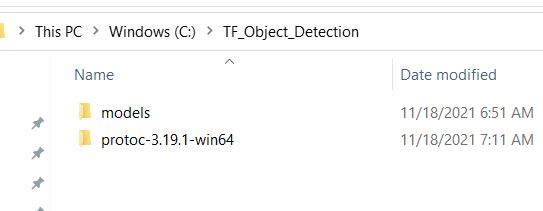

In [ ]:
3. Create Below the files and folders on "models\research" path

    1. training
    
    2. images
        - train
        - test
        
    3. inference_graph
        
    3. upload below the files on "models\research" path
        - generate_tfrecord.py
        - xml_to_csv.py
        
    4. faster_rcnn_inception_v2_coco_2018_01_28 (Extracted files)
        - http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
            
    5. Copy and paste respected Annotation and image files on images(train and test) folder
    
    6. Copy the config file from 'C:\TFOD_Demo\models\research\object_detection\samples\configs' to "models\reseach\training"
        - Here were are copying 'faster_rcnn_inception_v2_coco.config'
    
    7. Paste 'labelmap.pbtxt' on the path 'research\training'
    
    8. Copy 'train.py' file from 'research\object_detection\legacy' to 'models\research' folder
    
    9. Copy folders 'deployment' and 'nets' from 'models\research\slim' to 'models\research'
    
    10. Copy and paste the 'export_inference_grap.py' file from '\models\research\object_detection' to '\models\research'


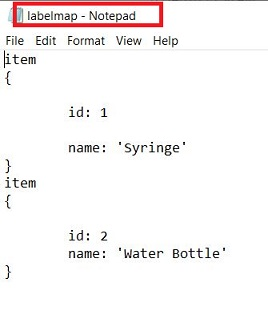

In [ ]:
4.# Install Object Detection : 

C:\TF_Object_Detection\models\research>python setup.py install

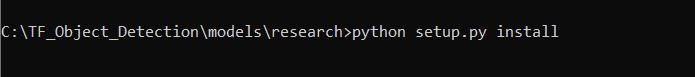

In [ ]:
# Compile protobuf  and convert to .py
# "C:\TF_Object_Detection\protoc-3.19.1-win64\bin\protoc.exe" object_detection/protos/*.proto --python_out=.

# Protobuff to py conversion
C:\TF_Object_Detection\models\research>"C:\TF_Object_Detection\protoc-3.19.1-win64\bin\protoc.exe" object_detection/protos/*.proto --python_out=.

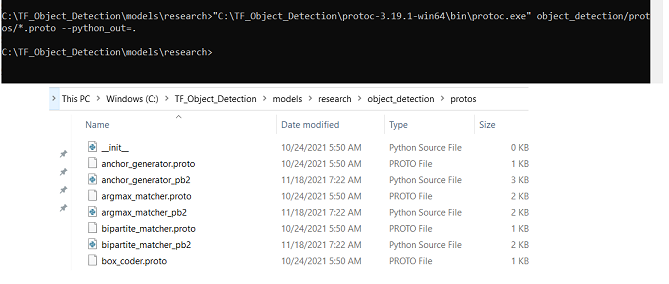

In [ ]:
# Convert XML to CSV using the for train and test Seperately

C:\TF_Object_Detection\models\research>python xml_to_csv.py images

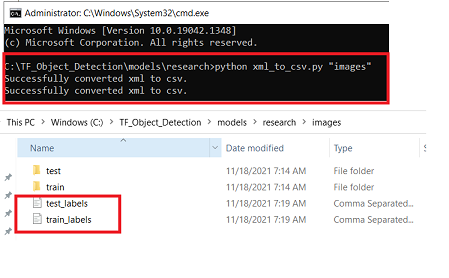

In [ ]:
# Generate TF records from train_csv and test_csv

python generate_tfrecord.py --csv_input="images/train_labels.csv" --image_dir="images/train" --output_path="train.record"
    
python generate_tfrecord.py --csv_input="images/test_labels.csv" --image_dir="images/test" --output_path="test.record"

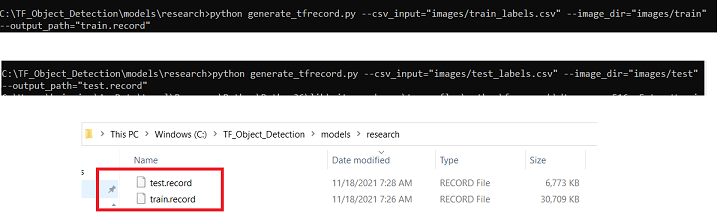

In [ ]:
'''
Configure Configuration file for Training

Open faster_rcnn_inception_v2_coco.config file and modify based on the requirements
        - models\research\training\faster_rcnn_inception_v2_coco.config
        
'''        
- Change num_classes: 2
    
- fine_tune_checkpoint: "C:/TF_Object_Detection/models/research/faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt"

- num_steps: 50

- train_input_reader: 
    - input_path: "C:/TF_Object_Detection/models/research/train.record"
    - label_map_path: "C:/TF_Object_Detection/models/research/training/labelmap.pbtxt"

- eval_input_reader
    - input_path: "C:/TF_Object_Detection/models/research/test.record"
    - label_map_path: "C:/TF_Object_Detection/models/research/training/labelmap.pbtxt"

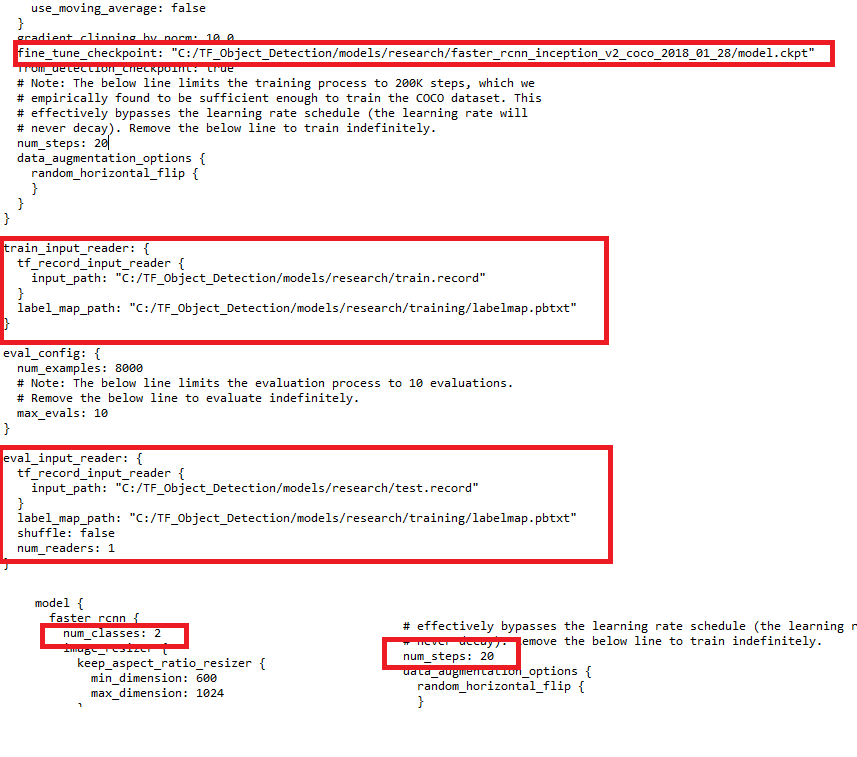

In [ ]:
# Run Training

'''
C:\TF_Object_Detection\models\research> python train.py 
    --logtostderr 
    --train_dir="training/" 
    --pipeline_config_path="training/faster_rcnn_inception_v2_coco.config"
 
'''

C:\TF_Object_Detection\models\research>python train.py --logtostderr --train_dir="training/" --pipeline_config_path="training/faster_rcnn_inception_v2_coco.config"


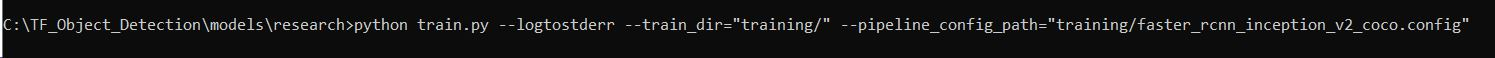

In [ ]:
# Convert the checkpoints files into modules using below the comman

'''
C:\TF_Object_Detection\models\research> python export_inference_graph.py 
    --input_type image_tensor 
    --pipeline_config_path "training/faster_rcnn_inception_v2_coco.config" 
    --trained_checkpoint_prefix "training/model.ckpt-20" --output_directory "inference_graph"

'''

C:\TF_Object_Detection\models\research>python export_inference_graph.py --input_type image_tensor --pipeline_config_path "training/faster_rcnn_inception_v2_coco.config" --trained_checkpoint_prefix "training/model.ckpt-20" --output_directory "inference_graph"

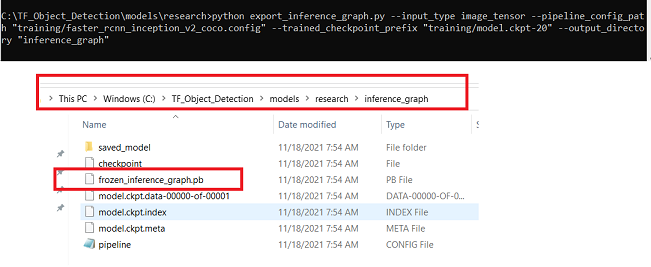